# Daugialypė regresija su `hour.csv` duomenimis

Šiame užduotyje naudosime `hour.csv` duomenis ir analizuosime, kaip įvairūs veiksniai (valanda, temperatūra, drėgmė, vėjas) veikia dviračių nuomos skaičių (`cnt`).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Įkeliame duomenis
df = pd.read_csv('hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,10,14,81,0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,9,14,80,0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,9,14,80,0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,10,14,75,0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,10,14,75,0,0,1,1


## 1. Duomenų vizualizacija ir koreliacijos analizė

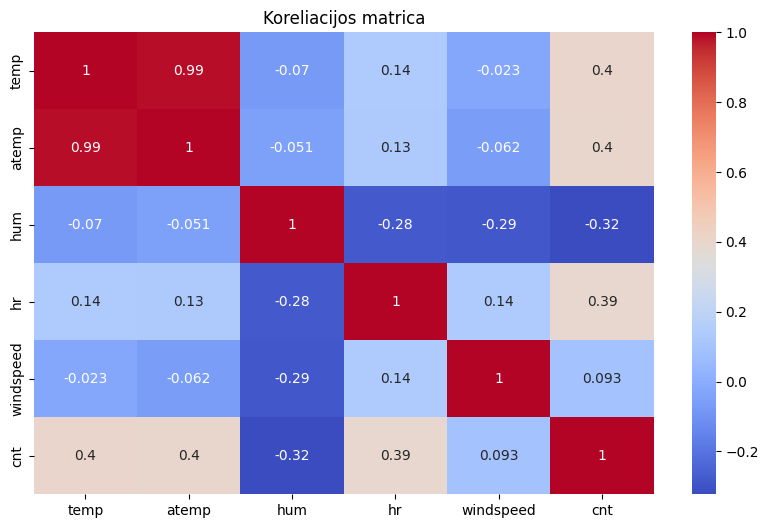

In [2]:
# Koreliacijos matrica
plt.figure(figsize=(10, 6))
sns.heatmap(df[['temp', 'atemp', 'hum', 'hr', 'windspeed', 'cnt']].corr(), annot=True, cmap='coolwarm')
plt.title('Koreliacijos matrica')
plt.show()

## 2. Regresijos modelio kūrimas
Pabandykime sukurti daugialypį modelį su nepriklausomais kintamaisiais: `hr`, `temp`, `hum`, `windspeed`, `weathersit`.

In [4]:
# Pasiruošimas modeliavimui
X = df[['hr', 'temp', 'hum', 'windspeed', 'weathersit','season', 'holiday','weekday']]
y = df['cnt']

# Pridedame konstantą regresijai
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     1110.
Date:                Wed, 06 Aug 2025   Prob (F-statistic):               0.00
Time:                        19:46:43   Log-Likelihood:            -1.1145e+05
No. Observations:               17379   AIC:                         2.229e+05
Df Residuals:                   17370   BIC:                         2.230e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6613      6.749      6.173      0.0

## 3. Interpretavimas
- Kurie kintamieji yra statistiškai reikšmingi? (žiūrėk p reikšmes)
- Kiek procentų priklausomo kintamojo paaiškinama modeliu (R²)?

## 4. BONUS: Dienos dalių įtraukimas
Pabandykime padalinti `hr` į rytą (6–11), dieną (12–17), vakarą (18–23) ir naktį (0–5).